In [2]:
import pandas as pd

df_full = pd.read_csv("/home/ubuntu/cur/program/Analyisis_incineration/EU/env_wasmun_linear_2_0.csv") # csv読み込み、変数「df_full」に代入。
df_full.head() # 最初の五行を表示。

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,wst_oper,Waste management operations,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2013,NaN,29.0,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2014,NaN,13.0,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2015,NaN,12.0,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2016,NaN,14.0,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2017,NaN,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# 「Unit of measure」が"Kilograms per capita"のみ抽出
df_kpc = df_full[df_full["Unit of measure"] == "Kilograms per capita"]

# データフレームのワイド化
df_wide = df_kpc.pivot_table(
    index=["Geopolitical entity (reporting)", "TIME_PERIOD"],
    columns=["Waste management operations"],
    values="OBS_VALUE"
)

# 結果の表示
df_wide.head()

Waste management operations                  Disposal - incineration (D10)  \
Geopolitical entity (reporting) TIME_PERIOD                                  
Albania                         2013                                  29.0   
                                2014                                  13.0   
                                2015                                  12.0   
                                2016                                  14.0   
                                2017                                   7.0   

Waste management operations                  Disposal - incineration (D10) and recovery - energy recovery (R1)  \
Geopolitical entity (reporting) TIME_PERIOD                                                                      
Albania                         2013                                                      32.0                   
                                2014                                                      15.0                   
                                2015                                                      20.0                   
                                2016                                                      21.0                   
                                2017                                                      15.0                   

Waste management operations                  Disposal - landfill and other (D1-D7, D12)  \
Geopolitical entity (reporting) TIME_PERIOD                                               
Albania                         2013                                              164.0   
                                2014                                              270.0   
                                2015                                              337.0   
                                2016                                              353.0   
                                2017                                              346.0   

Waste management operations                  Preparing for reuse  \
Geopolitical entity (reporting) TIME_PERIOD                        
Albania                         2013                         NaN   
                                2014                         NaN   
                                2015                         NaN   
                                2016                         NaN   
                                2017                         NaN   

Waste management operations                  Recovery - energy recovery (R1)  \
Geopolitical entity (reporting) TIME_PERIOD                                    
Albania                         2013                                     3.0   
                                2014                                     2.0   
                                2015                                     8.0   
                                2016                                     7.0   
                                2017                                     8.0   

Waste management operations                  Recycling  \
Geopolitical entity (reporting) TIME_PERIOD              
Albania                         2013               NaN   
                                2014               NaN   
                                2015               NaN   
                                2016               NaN   
                                2017               NaN   

Waste management operations                  Recycling - composting and digestion  \
Geopolitical entity (reporting) TIME_PERIOD                                         
Albania                         2013                                          NaN   
                                2014                                          NaN   
                                2015                                          NaN   
                                2016                                          NaN   
                                2017                         

In [5]:
# 列名を結合して単一レベルにする
df_wide.columns = ['_'.join([str(col)]).strip() for col in df_wide.columns.values]

# インデックスを列に戻す
df_wide = df_wide.reset_index()

# 結果の表示
print("After processing:")
print("Column names:")
for i, col in enumerate(df_wide.columns):
    print(f"  {i}: {col}")
print()
print("Shape:", df_wide.shape)
df_wide.head()

After processing:
Column names:
  0: index
  1: Geopolitical entity (reporting)
  2: TIME_PERIOD
  3: Disposal - incineration (D10)
  4: Disposal - incineration (D10) and recovery - energy recovery (R1)
  5: Disposal - landfill and other (D1-D7, D12)
  6: Preparing for reuse
  7: Recovery - energy recovery (R1)
  8: Recycling
  9: Recycling - composting and digestion
  10: Recycling - material
  11: Waste generated
  12: Waste treatment

Shape: (983, 13)


,index,Geopolitical entity (reporting),TIME_PERIOD,Disposal - incineration (D10),Disposal - incineration (D10) and recovery - energy recovery (R1),"Disposal - landfill and other (D1-D7, D12)",Preparing for reuse,Recovery - energy recovery (R1),Recycling,Recycling - composting and digestion,Recycling - material,Waste generated,Waste treatment
0,0,Albania,2013,29.0,32.0,164.0,NaN,3.0,NaN,NaN,78.0,325.0,325.0
1,1,Albania,2014,13.0,15.0,270.0,NaN,2.0,NaN,NaN,92.0,425.0,425.0
2,2,Albania,2015,12.0,20.0,337.0,NaN,8.0,NaN,NaN,89.0,491.0,491.0
3,3,Albania,2016,14.0,21.0,353.0,NaN,7.0,NaN,NaN,78.0,452.0,452.0
4,4,Albania,2017,7.0,15.0,346.0,NaN,8.0,NaN,NaN,76.0,436.0,436.0


In [6]:
# 各処理方法の割合を計算してカラムを追加
waste_treatment_columns = [
    "Disposal - incineration (D10)",
    "Disposal - incineration (D10) and recovery - energy recovery (R1)", 
    "Disposal - landfill and other (D1-D7, D12)",
    "Preparing for reuse",
    "Recovery - energy recovery (R1)",
    "Recycling",
    "Recycling - composting and digestion",
    "Recycling - material"
]

# 各処理方法の割合を計算（Waste treatmentに対する割合）
for col in waste_treatment_columns:
    ratio_col_name = f"{col}_ratio"
    df_wide[ratio_col_name] = (df_wide[col] / df_wide["Waste treatment"]) * 100

# 結果の確認
print("追加された割合カラム:")
ratio_columns = [col for col in df_wide.columns if col.endswith("_ratio")]
for i, col in enumerate(ratio_columns):
    print(f"  {col}")

# 一部のデータを確認
df_wide[["Geopolitical entity (reporting)", "TIME_PERIOD", "Waste treatment"] + ratio_columns].head()

追加された割合カラム:
  Disposal - incineration (D10)_ratio
  Disposal - incineration (D10) and recovery - energy recovery (R1)_ratio
  Disposal - landfill and other (D1-D7, D12)_ratio
  Preparing for reuse_ratio
  Recovery - energy recovery (R1)_ratio
  Recycling_ratio
  Recycling - composting and digestion_ratio
  Recycling - material_ratio


,Geopolitical entity (reporting),TIME_PERIOD,Waste treatment,Disposal - incineration (D10)_ratio,Disposal - incineration (D10) and recovery - energy recovery (R1)_ratio,"Disposal - landfill and other (D1-D7, D12)_ratio",Preparing for reuse_ratio,Recovery - energy recovery (R1)_ratio,Recycling_ratio,Recycling - composting and digestion_ratio,Recycling - material_ratio
0,Albania,2013,325.0,8.923077,9.846154,50.461538,NaN,0.923077,NaN,NaN,24.000000
1,Albania,2014,425.0,3.058824,3.529412,63.529412,NaN,0.470588,NaN,NaN,21.647059
2,Albania,2015,491.0,2.443992,4.073320,68.635438,NaN,1.629328,NaN,NaN,18.126273
3,Albania,2016,452.0,3.097345,4.646018,78.097345,NaN,1.548673,NaN,NaN,17.256637
4,Albania,2017,436.0,1.605505,3.440367,79.357798,NaN,1.834862,NaN,NaN,17.431193


In [7]:
df_wide.describe()

,index,TIME_PERIOD,Disposal - incineration (D10),Disposal - incineration (D10) and recovery - energy recovery (R1),"Disposal - landfill and other (D1-D7, D12)",Preparing for reuse,Recovery - energy recovery (R1),Recycling,Recycling - composting and digestion,Recycling - material,Waste generated,Waste treatment,Disposal - incineration (D10)_ratio,Disposal - incineration (D10) and recovery - energy recovery (R1)_ratio,"Disposal - landfill and other (D1-D7, D12)_ratio",Preparing for reuse_ratio,Recovery - energy recovery (R1)_ratio,Recycling_ratio,Recycling - composting and digestion_ratio,Recycling - material_ratio
count,983.000000,983.000000,940.000000,923.000000,972.000000,104.000000,933.000000,908.000000,930.000000,928.000000,980.000000,975.000000,940.000000,923.000000,970.000000,104.000000,933.000000,908.000000,930.000000,928.000000
mean,491.000000,2009.421160,9.221277,96.501625,231.296296,1.038462,89.012862,150.198238,51.006452,96.796336,490.732653,468.991795,1.781831,17.845646,54.941221,0.176633,16.422195,28.751342,9.623630,18.713345
std,283.911958,8.241989,32.183711,114.128228,155.612165,1.879491,112.980409,117.853937,53.018346,73.753800,129.567971,137.082920,6.004705,18.643517,35.521356,0.289034,18.448246,19.247334,9.003948,12.314767
min,0.000000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,178.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,245.500000,2002.000000,0.000000,0.000000,98.750000,0.000000,0.000000,46.000000,6.000000,33.000000,405.000000,380.500000,0.000000,0.000000,19.866462,0.000000,0.000000,11.729144,1.516431,8.132525
50%,491.000000,2010.000000,0.000000,44.000000,235.500000,0.000000,37.000000,133.000000,34.000000,91.000000,480.500000,462.000000,0.000000,11.157025,62.023204,0.000000,8.941176,29.710240,7.663888,19.848230
75%,736.500000,2017.000000,1.000000,173.000000,341.000000,2.000000,163.000000,230.000000,84.000000,140.000000,585.000000,551.000000,0.372475,34.514409,88.098560,0.306512,31.307551,44.044267,16.082059,27.450980
max,982.000000,2023.000000,247.000000,474.000000,676.000000,9.000000,474.000000,521.000000,253.000000,343.000000,862.000000,862.000000,41.166667,63.921569,100.000000,1.306241,63.921569,76.790123,38.923077,58.765432


In [8]:
# df_wide[df_wide["Waste generated"] == df_wide["Waste generated"].min()] # 結果: コソボ, 2015年
# df_wide[df_wide["Geopolitical entity (reporting)"] == "Kosovo*"]
df_wide_2023 = df_wide[df_wide["TIME_PERIOD"] == 2023]
df_wide_2023

,index,Geopolitical entity (reporting),TIME_PERIOD,Disposal - incineration (D10),Disposal - incineration (D10) and recovery - energy recovery (R1),"Disposal - landfill and other (D1-D7, D12)",Preparing for reuse,Recovery - energy recovery (R1),Recycling,Recycling - composting and digestion,...,Waste generated,Waste treatment,Disposal - incineration (D10)_ratio,Disposal - incineration (D10) and recovery - energy recovery (R1)_ratio,"Disposal - landfill and other (D1-D7, D12)_ratio",Preparing for reuse_ratio,Recovery - energy recovery (R1)_ratio,Recycling_ratio,Recycling - composting and digestion_ratio,Recycling - material_ratio
10,10,Albania,2023,0.0,14.0,234.0,0.0,14.0,NaN,0.0,...,306.0,306.0,0.000000,4.575163,76.470588,0.000000,4.575163,NaN,0.000000,NaN
67,67,Belgium,2023,0.0,310.0,1.0,9.0,310.0,378.0,137.0,...,689.0,689.0,0.000000,44.992743,0.145138,1.306241,44.992743,54.862119,19.883890,33.671988
132,132,Croatia,2023,0.0,8.0,246.0,NaN,8.0,171.0,30.0,...,475.0,425.0,0.000000,1.882353,57.882353,NaN,1.882353,40.235294,7.058824,33.176471
161,161,Cyprus,2023,0.0,17.0,411.0,3.0,17.0,107.0,20.0,...,674.0,535.0,0.000000,3.177570,76.822430,0.560748,3.177570,20.000000,3.738318,15.887850
244,244,Estonia,2023,0.0,159.0,2.0,NaN,159.0,177.0,36.0,...,373.0,339.0,0.000000,46.902655,0.589971,NaN,46.902655,52.212389,10.619469,41.887906
273,273,European Union - 27 countries (from 2020),2023,3.0,129.0,115.0,NaN,127.0,246.0,99.0,...,511.0,492.0,0.609756,26.219512,23.373984,NaN,25.813008,50.000000,20.121951,29.878049
302,302,Finland,2023,4.0,256.0,2.0,1.0,252.0,209.0,74.0,...,468.0,468.0,0.854701,54.700855,0.427350,0.213675,53.846154,44.658120,15.811966,28.846154
331,331,France,2023,0.0,161.0,121.0,3.0,160.0,224.0,100.0,...,530.0,506.0,0.000000,31.818182,23.913043,0.592885,31.620553,44.268775,19.762846,23.715415
360,360,Germany,2023,9.0,184.0,7.0,NaN,175.0,410.0,140.0,...,601.0,601.0,1.497504,30.615641,1.164725,NaN,29.118136,68.219634,23.294509,44.925125
417,417,Hungary,2023,0.0,53.0,233.0,NaN,53.0,143.0,60.0,...,429.0,429.0,0.000000,12.354312,54.312354,NaN,12.354312,33.333333,13.986014,19.347319


In [ ]:
df_wide_2023.describe()

,index,TIME_PERIOD,Disposal - incineration (D10),Disposal - incineration (D10) and recovery - energy recovery (R1),"Disposal - landfill and other (D1-D7, D12)",Preparing for reuse,Recovery - energy recovery (R1),Recycling,Recycling - composting and digestion,Recycling - material,Waste generated,Waste treatment,Disposal - incineration (D10)_ratio,Disposal - incineration (D10) and recovery - energy recovery (R1)_ratio,"Disposal - landfill and other (D1-D7, D12)_ratio",Preparing for reuse_ratio,Recovery - energy recovery (R1)_ratio,Recycling_ratio,Recycling - composting and digestion_ratio,Recycling - material_ratio
count,24.00000,24.0,23.000000,23.000000,23.000000,12.000000,23.000000,22.000000,23.000000,22.000000,24.000000,23.000000,23.000000,23.000000,23.000000,12.000000,23.000000,22.000000,23.000000,22.000000
mean,536.62500,2023.0,1.434783,124.304348,160.304348,1.916667,122.869565,209.318182,72.304348,132.681818,506.250000,490.260870,0.312580,24.622547,34.042988,0.349620,24.310212,41.833835,14.447371,26.549076
std,295.36386,0.0,2.889260,107.557779,163.275404,2.539088,107.313603,105.034863,50.291365,66.920270,114.117883,116.032212,0.615953,19.255617,32.561432,0.388224,19.189671,16.973977,8.910582,11.442980
min,10.00000,2023.0,0.000000,0.000000,1.000000,0.000000,0.000000,21.000000,0.000000,19.000000,306.000000,288.000000,0.000000,0.000000,0.145138,0.000000,0.000000,3.750000,0.000000,3.392857
25%,294.75000,2023.0,0.000000,26.500000,14.000000,0.000000,26.500000,145.750000,33.000000,83.500000,441.750000,429.000000,0.000000,6.183686,2.222582,0.000000,6.183686,33.767361,8.716134,19.545212
50%,604.50000,2023.0,0.000000,92.000000,115.000000,1.000000,92.000000,201.000000,75.000000,124.500000,473.500000,468.000000,0.000000,26.219512,23.913043,0.244755,25.347222,43.019588,16.541353,26.253707
75%,774.50000,2023.0,1.500000,186.000000,240.000000,3.000000,182.000000,266.250000,99.500000,152.250000,580.000000,547.500000,0.304878,40.843557,56.097354,0.568782,40.843557,51.983967,20.002920,32.747521
max,982.00000,2023.0,10.000000,339.000000,539.000000,9.000000,339.000000,410.000000,176.000000,270.000000,724.000000,723.000000,2.331002,58.974359,96.250000,1.306241,58.974359,72.027972,30.769231,53.846154


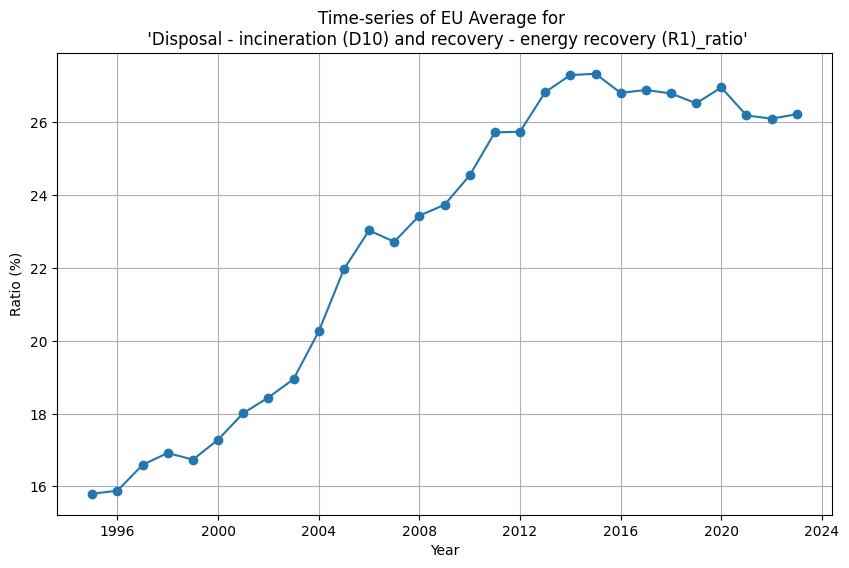

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# EU平均のデータを抽出
df_eu = df_wide[df_wide["Geopolitical entity (reporting)"] == "European Union - 27 countries (from 2020)"]

# プロット対象のカラム
target_column = "Disposal - incineration (D10) and recovery - energy recovery (R1)_ratio"

# グラフの作成
plt.figure(figsize=(10, 6))
plt.plot(df_eu["TIME_PERIOD"], df_eu[target_column], marker='o', linestyle='-')

# グラフのタイトルとラベルを設定
plt.title("Time-series of EU Average for \n 'Disposal - incineration (D10) and recovery - energy recovery (R1)_ratio'")
plt.xlabel("Year")
plt.ylabel("Ratio (%)")

# X軸の目盛りを整数にする
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()